In [1]:
%matplotlib inline
import math
import numpy as np

from tdfs.routines import tdfs_routine, tdfs_log_upper_bound
from rho_rand.routines import rho_rand_routine
from plots import regret_plt

In [5]:
#  UNIVERSE PARAMETERS
n_users = 3
n_arms = 5
t_horizon = 1000
arm_means = [0.2, 0.3, 0.5, 0.8, 0.9]
best_arms_mean = np.sort(arm_means)
best_arms_mean = best_arms_mean[::-1]
best_arms_mean = best_arms_mean[:n_users]
# MONTE-CARLO PARAMETERS
mc_horizon = 50

# Single example TDFS
This next run is designed just to show the results we obtain with TDFS

In [ ]:
total_rewards_tdfs = tdfs_routine(n_users, n_arms, t_horizon, arm_means, alg='ucb')

In [ ]:
regret_plt(best_arms_mean, total_rewards_tdfs)

# TDFS expected regret curve
This next section is designed to show the expected regret curve using a Monte-Carlo strategy. It also shows the upper bound calculated thanks to the theorem 2.

In [ ]:
tdfs_rewards = np.zeros((mc_horizon, t_horizon))

In [ ]:
for t in range(mc_horizon):
    tdfs_rewards[t, :] = tdfs_routine(n_users, n_arms, t_horizon, arm_means)[:, 0]

In [ ]:
c = tdfs_log_upper_bound(n_users, arm_means)
upper_bound = [c * math.log(t) for t in range(1, t_horizon)]
upper_bound = [0] + upper_bound

In [ ]:
tdfs_expected_rewards = np.mean(tdfs_rewards, axis=0)
regret_plt(best_arms_mean, tdfs_expected_rewards, upper_bound=upper_bound)

# Single example Rho Rand
This next run is designed just to show the results we obtain with rho rand

In [3]:
total_rewards_rho_rand = rho_rand_routine(n_users, n_arms, t_horizon, arm_means, alg='ucb')

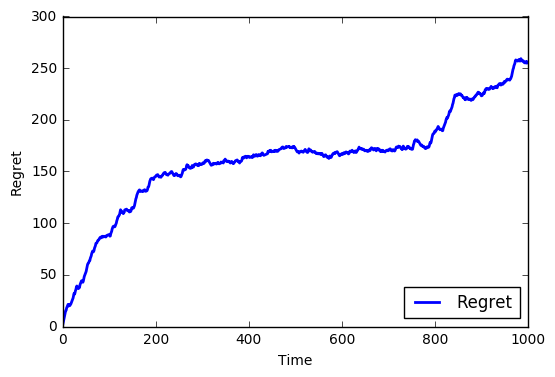

In [4]:
regret_plt(best_arms_mean, total_rewards_rho_rand)

# Rho Rand expected regret curve
This next section is designed to show the expected regret curve using a Monte-Carlo strategy.

In [6]:
rho_rand_rewards = np.zeros((mc_horizon, t_horizon))

In [7]:
for t in range(mc_horizon):
    rho_rand_rewards[t, :] = rho_rand_routine(n_users, n_arms, t_horizon, arm_means)[:, 0]

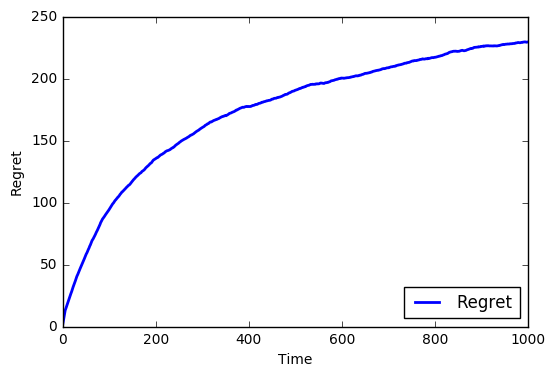

In [8]:
rho_rand_expected_rewards = np.mean(rho_rand_rewards, axis=0)
regret_plt(best_arms_mean, rho_rand_expected_rewards)